# Introduction

The objective of this assignment was to explore and learn about many different topics. We begin with problems involving hash tables, depth first search and breadth first search. We then move onto analyse the time complexity of different sorting algorithms. Finally, we explore Dijkstra's algorithm and minimum spanning trees. An discussion of all topics and findings will be provided throughout. 

## Part A
### Q1) Hash Tables

#### Draw the 11-entry hash table that results from using the hash function:
    h (i) = (3i+5) mod 11

We have summarised all answers in the table below. ```h(k)``` refers to the hash value for each key. ```Chain level 1```,  ```Chain level 2``` and ```Chain level 3``` refers to the results of the hash table assuming collisions are handled by circular chaining. ```Linear Probing``` refers to the results of the table assuming collisions are handled by linear probing. 

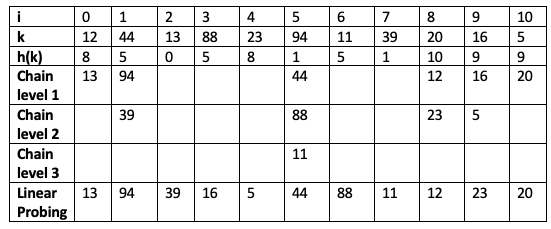

#### Explain and discuss some differences between circular chaining and linear probing:

Before explaining the differences between circular chaining and linear probing, we will first introduce hash tables. 

A hash table is a data structure that stores data in an associative manner, where keys are mapped to values. The data in a hash table is stored in an array type and each data value has its own unique index value. A hash function (such as the one used above) is used to convert a range of key values into a range of indexes of an array. This creates a table which has a search time of $O(1)$.

Collisions occur when keys are not all mapped to unique integers. As a result, some keys must be stored in the same index of the hash table. Separate chaining and linear probing are both ways of dealing with collisions in hash tables. We will now explain and discuss some differences between cicular chaining and linear probing, as discussed in lecture 11 and at https://www.hackerearth.com/practice/data-structures/hash-tables/basics-of-hash-tables/tutorial/. 

**Separate Chaining**
- With separate chaining, each cell of a hash table points to a linked list of elements that have the same hash function values. When collision occurs, elements are added to the linked lists.
- The cost of searching a previously inserted key/value pair in a hash table using separate chaining is that of scanning the entries of the selected linked list for the required key. If the distribution of the keys is sufficiently uniform, then the average cost of a search depends only on the average number of keys per linked list. This will give a time complexity of $O(1)$. The worst case for separate chaining occurs when all entries are inserted into the same list, leading to a time complexity of $O(n)$.
- Deletion works similarly to searching, with the linked list being traversed until the key is found and can then be removed. 
- Separate chaining is easy to implement and the hash table never fills up as we can keep adding elements to each of the linked lists. As a result, it is good to use when it is not known in advance how many keys will be inserted or deleted.
- The cache performance is not as good as with linear probing as the keys are stored in separate linked lists.

**Linear Probing**
- With linear probing, which is a form of open addressing, insertion involves linearly searching the hash table until an empty slot is found. As an example, let us assume that the algorithm tries to place a new element at index 4, but index 4 is occupied. To resolve this collision, the algorithm will probe index 5, 6 and so on until it finds an empty space. The array may need to be increased in size if no space is found. In comparison to insertion with separate chaining, memory does not need to be allocated for another link in the chain. 
- As with separate chaining, searching for an entry will generally be $O(1)$. When searching for an entry, the array is scanned in the same way as for insertion until either the target element is found or an unoccupied slot is found. If an empty slot is found then the key cannot be in the table, because it would have been placed in that cell in preference to any later cell that has not yet been searched.
- Deletions are more complex with linear probing than circular chaining. When removing a key/value pair from the hash table, the slot cannot simply be emptied. This is because it would affect searches for other keys that have a hash value earlier than the emptied cell, but that are stored in a position later than the emptied cell. To avoid this, a special flag can be added to the emptied slots. Re-hashing may also need to be performed. 
- In comparison to separate chaining which works well when the number of keys to be inserted is unknown, with linear probing the size of the table must be greater than or equal to the number of keys. In other words, linear probing is used when the number of keys is known.

### Q2) Undirected Graphs
 
a) In the cell below is a screenshot of G, the graph generated from Table 1. 

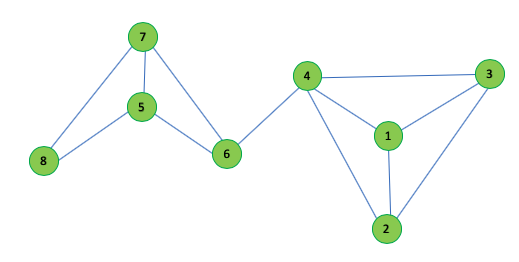

We will now perform a depth first search (DFS) followed by a breadth first search (BFS) on G. We will briefly decribe the steps being taken in order to obtain the sequences. As per the assignment, we will then define DFS and BFS and discuss the sequences obtained. 

### b) Sequence of vertices of G visited using a DFS traversal starting at vertex 1:

For ease of understanding, I will present each step of the route as a pair, with the first element in the pair representing the vertex we are moving from, and the second element representing the vertex being travelled to. This is similar to the way that ```networkx``` outputs the results as seen in Lab 7.

- We begin at vertex 1. Adjacent to 1 are 2,3 and 4. All are unvisited so we can choose any of these. We will choose 2. (1,2) 
- Adjacent to 2 are 1,2,3. We are only interested in unvisited nodes. We will choose 3. (2,3)
- The only unvisited node adjacent to 3 is 4. Thus, the next step is (3,4).
- The only unvisited node adjacent to 4 is 6. Thus, we move from 4 to 6. (4,6)
- 6 is adjacent to both 5 and 7 and both are unvisited. As a result we can choose either. We choose to move from 6 to 5. (6,5)
- 5 is adjacent to 6,7 and 8. Only 7 and 8 are unvisited. We choose 7. (5,7)
- From 7 the only unvisited node is 8. (7,8)

**Steps taken to obtain sequence:**
(1,2),(2,3),(3,4),(4,6),(6,5),(5,7),(7,8)

**Sequence obtained:** 1, 2, 3, 4, 6, 5, 7, 8

### c) Sequence of vertices of G visited using a BFS traversal starting at vertex 1:

- We start at vertex 1. 
- The nodes adjacent to 1 are 2,3,4 so we visit all 3. (1,2), (1,3), (1,4)
- These nodes can now be considered as one and all nodes adjacent to this node are now considered. 6 is the only node adjacent to these nodes so we visit 6. (4,6)
- 5 and 7 are adjacent to these nodes so we visit them next. (6,5), (6,7)
- 8 is the only unvisited node adjacent to the visited nodes so we will visit this node next. (7,8) 

**Steps taken to obtain sequence:**
(1,2), (1,3), (1,4), (4,6), (6,5), (6,7), (7,8)

**Sequence obtained:** 1, 2, 3, 4, 6, 5, 7, 8

### Discuss the terms DFS and BFS in your own words briefly and discuss your observations about the obtained sequences. 

We can see that the sequences obtained from both DFS and BFS algorithms are the same but the paths taken to reach the last vertex are quite different for each. 

Depth first search (DFS) traverses a graph using the idea of backtracking. This algorithm traverses nodes in a depthward motion until a deadend is reached. We can see this in the steps taken to obtain the sequence above. The value of the vertex we are travelling from is increasing with each step. As described in chatper 14 of the course text-book, DFS is often implemented with a stack, with visited vertices being pushed into the stack. If it reaches a deadend it backtracks and pops a vertex from the stack in order to continue searching. 

Breadth first search (BFS) on the other hand moves horizontally and explores the neighbour nodes of the current layer first, before moving to the next level neighbour nodes. This is seen in the steps taken above, with the value of the vertex we are travelling from reamaining at 1 until all neighbours of 1 have been visited. BFS is commonly implemented using a queue. BFS is more suitable than DFS for searching vertices which are close to the source node.

The time complexity of both algorithms is $O(V + E)$ where V stands for vertices and E stands for edges. 

## Part B:
### Q1 Sorting Algorithms

- In the cells below we will execute bubble, quick and merge sort algorithms. As instructed, we will use the code provided in lab 6. 
- We will compute the running time of each algorithm to sort an input list A with x integer elements. 
- The input list A will initially be sorted in reverse order. Each of the sorting algorithms will then sort this list in ascending order. 
- Using different values for x, we will then plot the running time as a function of x for each algorithm. 
- For ease of understanding, we will give a brief introduction to each sorting algorithm before providing the code. A more in-depth discussion will be provided after computing the running times. 

In [1]:
from time import perf_counter
import matplotlib.pyplot as plt

**Bubble sort**
Bubble sort repeatedly steps through the list and repeatedly swaps adjacent elements if they are in the wrong order. This is repeated until the list is sorted. 

In [2]:
#code from lab 6
def bubble_sort(arr):
    arr_size = len(arr)
    for i in range(arr_size):
        for j in range(i, arr_size):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

**Quick sort**
Quick sort uses a divide and conquer technique to sort a list. It consists of the following steps:
- **Divide (also referred to as partition):** A specific element is chosen from the list A known as the pivot. All elements are removed from A and added to three sub-arrays: 
    - less: stores the elements in A which are less than the pivot.
    - equal: stores the elements in A which are equal to the pivot. 
    - greater: stores the elements in A which are greater than the pivot.
- **Conquer:** Recursively sort the arrays less and greater.
- **Combine:** Join less, equal, greater back together in that specific order.

In [3]:
#code from lab 6
def quicksort(data):
    if len(data) > 1:
        less = []
        equal = []
        greater = []
        pivot = data[0]

        for x in data:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            else:
                greater.append(x)

        return quicksort(less) + equal + quicksort(greater)

    else:
        return data

Like quicksort, merge sort also uses the divide and conquer technique. In the ```mergesort``` algorithm, two sorted arrays are merged together. 

**Merge:**
Given two arrays *left* and *right*, the aim is to combine them into a single sorted array *result*. The ```merge``` algorithm consists of the following steps:
- Compare the first element of *left* to the first element of *right*.
- Take the smaller of the two values and remove it from its array. 
- Append the value to *result*.
These steps are repeatedly performed until either *left* or *right* is empty. 

**Mergesort:**
The merge algorithm just described is used in the mergesort algorithm. The following steps are taken in mergesort: 
- **Divide:** Split array A into two arrays, each containing half of the elements of A. If the length of A is less than 2, the array is already sorted. 
- **Conquer:** Recursively sort the two arrays.
- **Combine:** Merge the sorted arrays back into A. 

In [4]:
#code from lab 6
def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
 
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    return result


def mergesort(arr):
    if len(arr) <= 1:
        return arr
 
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
 
    left = mergesort(left)
    right = mergesort(right)
    return list(merge(left, right))

Before proceeding with timing the functions, we will perform unittesting to ensure that the code for each algorithm is correctly sorting an array. 

In [5]:
import unittest

class SortingAlgorithmTest(unittest.TestCase):

    def test_bubblesort(self):
        '''test bubble sort'''
        arr = [5,4,3,2,1]
        self.assertEqual(sorted(arr), bubble_sort(arr))
        
    def test_quicksort(self):
        '''test quicksort'''
        arr = [5,4,3,2,1]
        self.assertEqual(sorted(arr), quicksort(arr))
        
    def test_mergesort(self):
        '''test mergesort'''
        arr = [5,4,3,2,1]
        self.assertEqual(sorted(arr), mergesort(arr))
                          
unittest.main(argv=[''], verbosity=2, exit=False)

test_bubblesort (__main__.SortingAlgorithmTest)
test bubble sort ... ok
test_mergesort (__main__.SortingAlgorithmTest)
test mergesort ... ok
test_quicksort (__main__.SortingAlgorithmTest)
test quicksort ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


We can see that all three algorithm are successfully sorting an array which is initially in reverse order. We can now proceed with timing the algorithms. 

We will begin by creating a function ```create_array()``` which takes ```length``` as an argument and creates an array of length ```length``` which sorted in descending order. As specified in the assignment, the array created will range from ```length-1``` to ```0```.

In [6]:
def create_array(length):
    '''create an array sorted in descending order'''
    values = []
    for i in range(length-1, -1, -1):
        values.append(i)
    return values

Next, we will check that this array is indeed printing out an array which is sorted in reverse order. 

In [7]:
class CreateArrayTest(unittest.TestCase):

    def test_createArray(self):
        '''test create_array()'''
        self.assertEqual(create_array(5), [4,3,2,1,0])
        self.assertEqual(create_array(10), [9,8,7,6,5,4,3,2,1,0])

                          
unittest.main(argv=[''], verbosity=2, exit=False)

test_createArray (__main__.CreateArrayTest)
test create_array() ... ok
test_bubblesort (__main__.SortingAlgorithmTest)
test bubble sort ... ok
test_mergesort (__main__.SortingAlgorithmTest)
test mergesort ... ok
test_quicksort (__main__.SortingAlgorithmTest)
test quicksort ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.022s

OK


The next step is to create a function called ```time_sorting_algorithm```. 
- It takes a specific sorting algorithm as an argument.
- The function iterates through different values ranging from 1 to 1000 in steps of 10 in order to create arrays of different sizes using the ```create_array()``` method defined above. 
- Each of these different sized arrays is then given as an argument to the sorting algorithm. 
- This function then times how long it takes the sorting algorithm to sort each array. The time taken is added to a dictionary ```results``` with the size of the array being the key. 
- Thus, each sorting algorithm will end up with its own dictionary of results. 

In [8]:
def time_sorting_algorithm(algorithm):
    '''measure the time taken to sort arrays of different size using different sorting algorithms.
    
    results are stored in a dictionary.'''
    results = {}
    for i in range(1, 2000, 10):
        values = create_array(i)
        t1_start = perf_counter()
        algorithm(values)
        t1_stop = perf_counter()
        results[i] = t1_stop-t1_start
    return results

Next, we create another dictionary called ```sorted_algorithms```. The keys in this dictionary are the names of the different sorting algorithms. The value for each key is the dictionary defined in ```time_sorting_algorithm``` above.

In [9]:
#create a new empty dictionary
sorting_algorithms = {}

In [10]:
#call the time_sorting_algorithm function and create a dictionary of bubble sort results
sorting_algorithms['bubble_sort'] = time_sorting_algorithm(bubble_sort)

In [11]:
#call the time_sorting_algorithm function and create a dictionary of quicksort results
sorting_algorithms['quick_sort'] = time_sorting_algorithm(quicksort)

In [12]:
#call the time_sorting_algorithm function and create a dictionary of merge sort results
sorting_algorithms['merge_sort'] = time_sorting_algorithm(mergesort)

Next, we plot the running times as a function of the array size for each sorting algorithm. For ease of understanding, we first plot each algorithm individually and then plot all together.

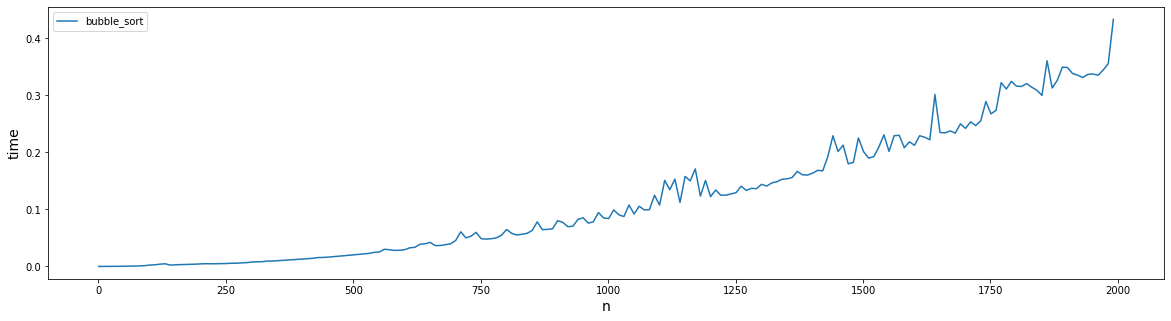

<Figure size 432x288 with 0 Axes>

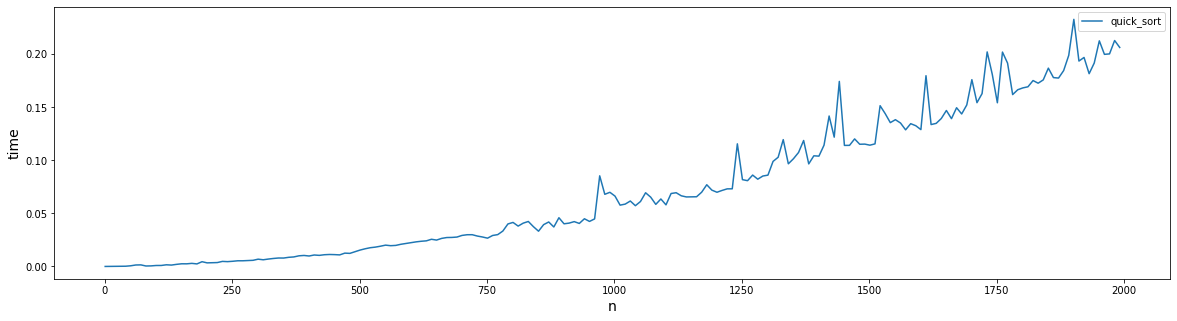

<Figure size 432x288 with 0 Axes>

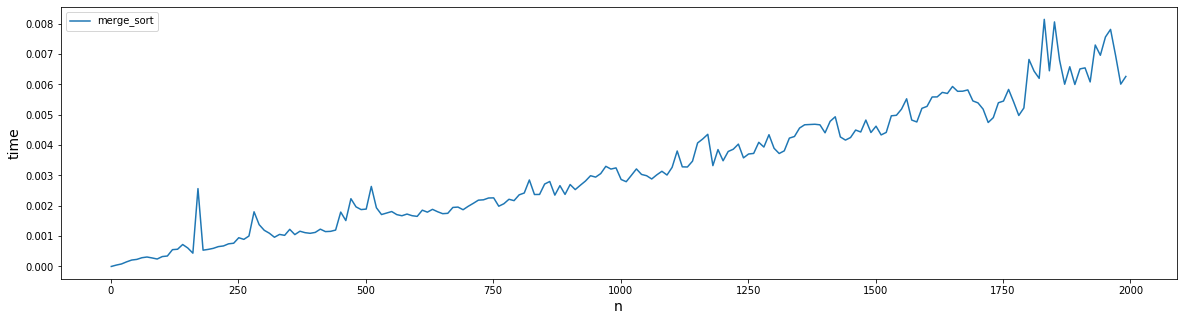

<Figure size 432x288 with 0 Axes>

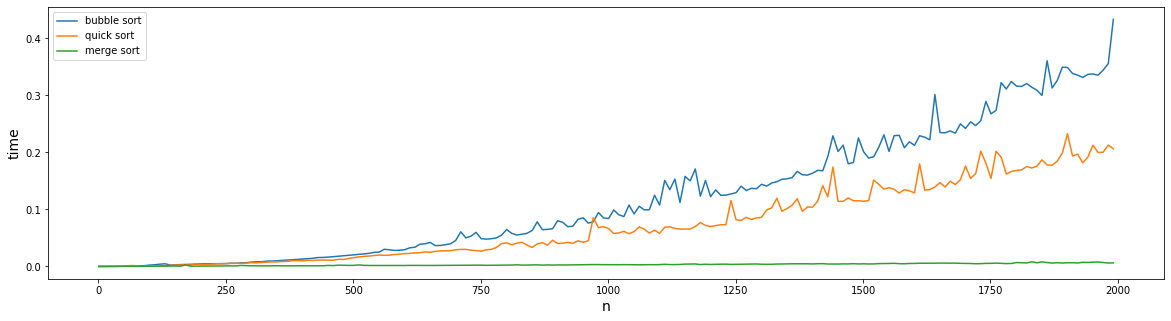

<Figure size 432x288 with 0 Axes>

In [13]:
#s is key of the dict
for algorithm in sorting_algorithms:
    
    # create a variable containing the dictionary of running times for each size of array
    dict_of_time_results = sorting_algorithms[algorithm]

    # l1 is a list of the keys which are the different sizes of the array
    l1 = list(dict_of_time_results.keys())
    #l2 is a list of runnning times for each size array
    l2 = [dict_of_time_results[size] for size in dict_of_time_results]

    plt.figure(figsize=(20,5))
    #index the list. l[0] is n and l[1] is the running times
    plt.plot(l1,l2, label = algorithm)
    #add labels 
    plt.xlabel('n',fontsize =14)
    plt.ylabel('time',fontsize =14)
    #show legend
    plt.legend()
    #show plot
    plt.show()
    plt.savefig( algorithm + '.png')


x = list(sorting_algorithms['bubble_sort'].keys())  
bubblesort_times = [sorting_algorithms['bubble_sort'][time] for time in sorting_algorithms['bubble_sort']]
quicksort_times = [sorting_algorithms['quick_sort'][time] for time in sorting_algorithms['quick_sort']]
mergesort_times = [sorting_algorithms['merge_sort'][time] for time in sorting_algorithms['merge_sort']]
    
    

plt.figure(figsize=(20,5))
#plot functions
plt.plot(x, bubblesort_times, label = 'bubble sort')
plt.plot(x, quicksort_times, label = 'quick sort')
plt.plot(x, mergesort_times, label = 'merge sort')
#add labels 
plt.xlabel('n',fontsize =14)
plt.ylabel('time',fontsize =14)
# #show legend
plt.legend()
# #show plot
plt.show()
plt.savefig('all_algorithms.png')

#### Discussion of results: 

We can see in the graphs that merge sort is faster than bubble sort and quick sort. To understand this result, we will now discuss each algorithm in terms of time complexity and initial distribution of input data.

#### Bubble sort:
Bubble sort compares each element in an array one by one and sorts them based on their values. This algorithm will start by comparing the first element of the array with second. If the firest element is greater than the second, it will swap the two elements. It will then move on to compare the second and third elements and so on to the end of the array. 

The worst case for bubble sort is if the smallest element is in the last position of the array. This means that for an array of n elements, the swapping process will need to be repeated n-1 times in order to move the smallest element to the front of the array. Based on the number of comparisons this takes, the time complexity is $O(n^{2})$.

The input given to bubble sort above was sorted in reverse order with the smallest element being at the end of the array and thus the time complexity in our case is *O(n^{2})* as seen in the curve above. 

#### quick sort:
As discussed above, the partition stage of quicksort divides the array into three subarrays based on the pivot. These three subarrays contain the elements less than the pivot, equal to the pivot and greater than the pivot. This step is seen in the for loop in ```quicksort``` above. We can see that this loop performs a constant number of operations per iteration. With *n* elements in our array, the time complexity of this partitioning section of ```quick_sort``` is $cn$, where *c* is a constant and *n* is the length of the array.

The worse case for quicksort occurs when the divide/parition step results in the most unbalanced partitions possible. This occurs when the pivot is the smallest or largest element in the array and all other elements are partitioned to one side of it. We can see in the ```quicksort``` method above that the pivot is the first element in the array for each recursive call of the function. Our input array is sorted in reverse order and so the first element of the array will be the largest element in the array. This results in one sub-array with no elements and another with n-1 elements.  

We have seen that each recursive call of ```quicksort``` has a time complexity of $cn$. Thus, in the worst case, it would take *n-1* nested calls before reaching an array of size 1. As a result, the worst case of quicksort runs in $O(n^{2})$, as seen in the graph above. 

#### merge sort:
To determine the time complexity of ```merge_sort``` will first discuss the time complexity of ```merge```. We can in above that each iteration of merge does one comparison and puts one value into the ```result``` list. A number is only considered once and thus each number in the two arrays ```left``` and ```right``` gets one operation. This gives a running time of *$(n1 + n2)$ for the ```merge``` algorithm. 

As mentioned above, the divide section of merge-sort splits the array into two arrays at each iteration, resulting overall in a tree-like structure, with each node(array) being split into two until the base case is reached. With an array of length n, this tree will have $O(logn)$ layers, as we are repeatedly dividing by 2. Each node in the tree has one merge operation associated with it which as discussed, takes $O(n1 + n2)$ time. This the whole ```merge_sort``` algorithm runs in $O(nlogn)$ time. This is seen in the graph above. The input given to the algorithm in reversed order does not change the time complexity, as merge-sort always divides the arrays into two halves.  

## 2) a. Dijkstra's algorithm

In this question, we will explore dijkstra's algorithm. Dijkstra's algorithm is used to compute the shortest path from a starting node to a target node in a weighted graph. A weighted graph is one in which the edges have weights or values. These weights can represent the cost or distance to travel from one node to another. Dijkstra's algorithm is applied many real-world applications such as maps and IP routing.

In the images below, we will step through Dijkstra's algorithm. Briefly, the steps are as follows:
- To begin with, we have set all nodes as white. The weights for each edge are written in black beside each edge. 
- We start at A and aim for G as the end. We start by colouring A orange to show that it has been visited. 
- We mark the distance to vertex A as 0 and all other vertices as ∞.
- We then calculate the total distance to each unvisited neighbour from the current vertex. In the graphs, we colour all neighbours yellow to show which are being considered. 
- Next, we update the neighbouring nodes distances if they are smaller than their current value. 
- We then choose the vertex with the lowest marked distance and select it as the current vertex. We change the colour of this vertex to orange to mark it as visited. 
- For ease of understanding, underneath each graph is a list of the nodes which have been visited. 


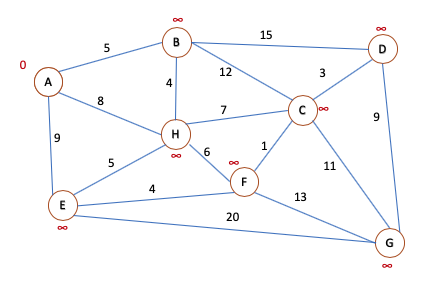

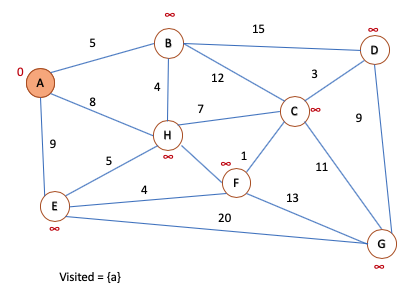

At this stage, vertex A has been visited. 

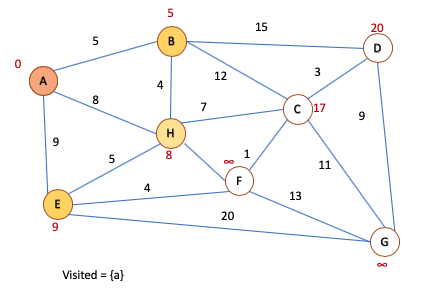

The distances to the neighbours of A have been decreased from ∞. The distance is now equal to the distance from A to each neighbour node. 

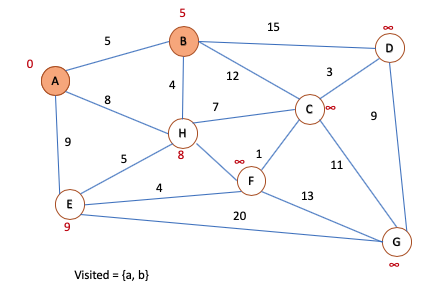

We have chosen to move to vertex B next, as it had the shortest distance from A out of the three neighbouring nodes we were considering. 

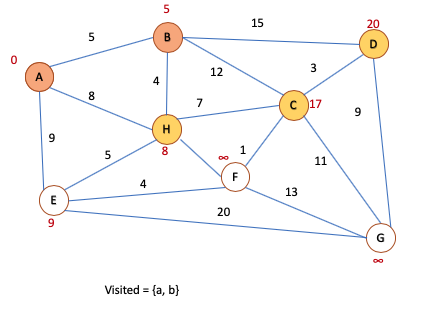

Above, we highlight the nighbours of B yellow and reduce their distances from ∞. We will move to H as it has the shortest distance from B. 

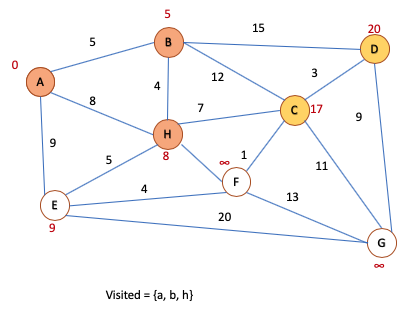

H is turned orange as it is visited. 

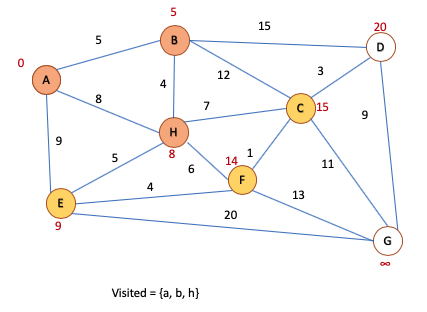

Above, we consider the neighbours and reduce their distances. We can see that the distance to F has decreased from ∞ to 14. The distance to C has decreased from 17 as we have now found a shorter path. 

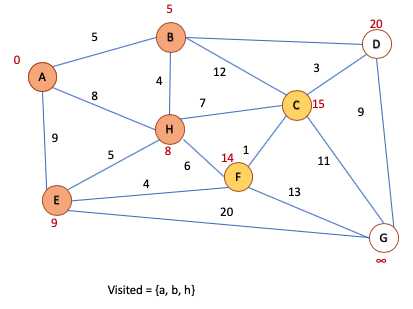

We have moved to E and colour it orange. 

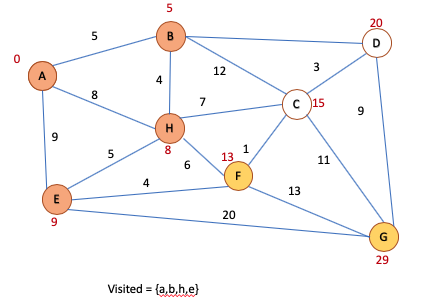

Above, we consider the neighbours of E and drop the distance to F to 13 and the distance to G to 29.

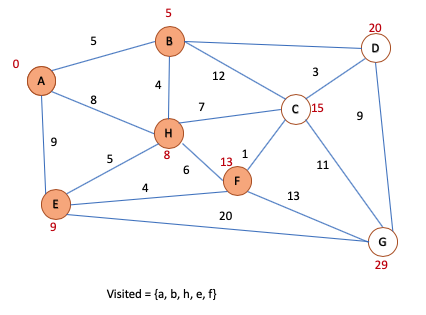

We have moved to F as it is a shorter distance and we colour it orange. 

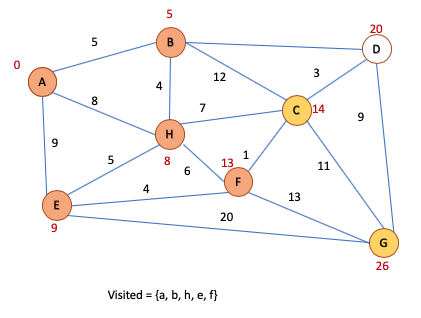

Above, we consider the neighbours of F. We drop the distance to C to 14, as we have found a shorter path via F. Similarly, we drop the distance to G to 26. 

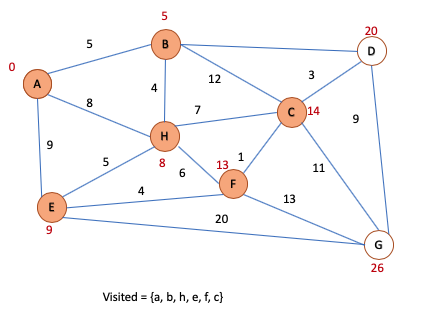

We move to C as it is the shortest distance from F.

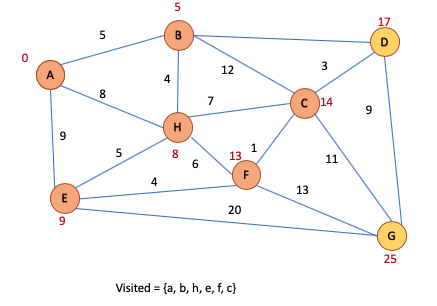

We consider all neighbours of C and drop their distances. 

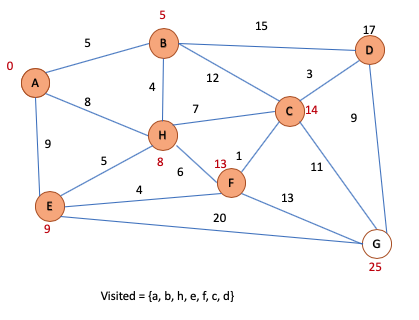

We have moved to D. 

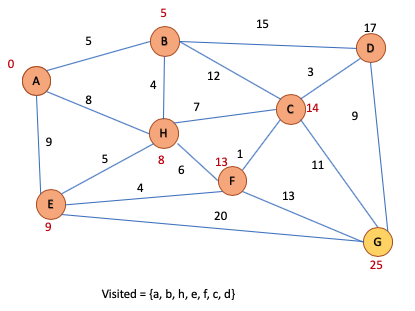

The only neighbour left is G. Next we move to G.

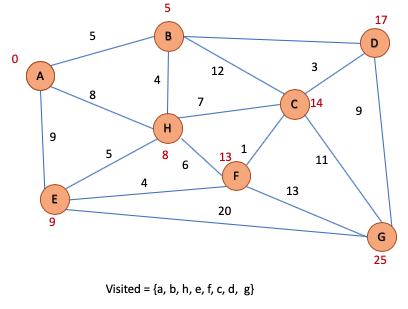

We will now verify the answer obtained in the graphs above using the ```networkx``` Python package. ```networkz``` is a library used to study graphs and networks. 

#### b) i. Create an empty weighted graph.

We will begin by creating a new weighted graph called G. We will begin by importing the necessary packages.

In [14]:
import networkx as nx
from networkx.algorithms import tree

In [15]:
#### i. Create an empty weighted graph.
G = nx.Graph()

#### ii. Add vertices (nodes) with their weights given in figure 1 to G.

- Next we will iterate through each of the nodes in G and add each to the graph using the  ```add_node()``` method. 
- The next step is then to add the edges to the graph. To do this we have created a dictionary of nodes. 
- The keys of the dictionary are each of the nodes excluding the last. The value for each key is an array of arrays. Within each nested array is a node and an integer value. The node represents a neighbour of the node which is the key and the integer value denotes the weight of the edge to that neighbouring node. 
- We then iterate through the dictionary and for each node we use the ```add_edge()``` method within the ```networkx``` library. 
- We have printed information regarding the graph below for ease of understanding and to ensure that our nodes and edges were correctly added. 

In [16]:
#add each node to the graph
for node in ['a','b','c','d','e','f','g','h']:
    G.add_node(node)

#dictionary of edges and weights for each node
nodes_dict = {
    'a':[['b',5], ['e',9], ['h',8]],
    'b': [['h',4], ['c',12], ['d',15]],
    'c': [['d',3], ['f',1], ['g',11], ['h',7]],
    'd': [['g',9]],
    'e': [['h',5], ['f',4], ['g',20]],
    'f': [['g',13]],  
}

#add edges and weights to each node
for node in nodes_dict: 
    for edge in nodes_dict[node]:
        G.add_edge(node, edge[0], weight = edge[1])

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 15
Average degree:   3.7500


#### iii. Draw G

/Users/hannahbarrett/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


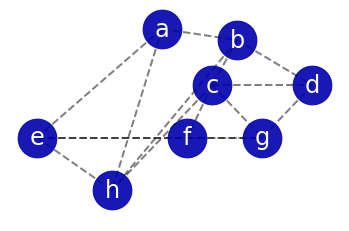

In [17]:
#co-ordinates of graph
pos= {'a': [-.2, .7], 'b': [.1,  .4], 'c': [0,-.8], 'd': [0.4, -0.8], 'e': [-.7, -2.2], 'f': [-.1, -2.2], 'g': [.2,-2.2], 'h': [ -.4, -3.6]}
nx.draw_networkx_nodes(G, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(G, pos,
                           width=2, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(G, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-4.5,1.3])
limits=plt.axis('off') # turn of axis

#### iv. Compute all shortest paths and distances between vertex A and all other reachable vertices in the graph using Dijkstra's algorithm. For each vertex, print a list that contains its shortest path with the minimum distance. 

In order to compute all shortest paths and distances between vertex A and all other reachable vertices, we will use the ```single_source_dijkstra()``` as described at https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.weighted.single_source_dijkstra.html/.

This method will returns a tuple of two dictionaries - ```length``` and ```path```. The dictionaries are keyed by node. ```length``` contains the shortest distance to each node from the source ```a```. ```path``` contains the path from the source ```a``` to that node. 

For ease of understanding, we will first print ```length``` and ```path``` as they are returned. 

In [18]:
length, path = nx.single_source_dijkstra(G, 'a')
length, path

({'a': 0, 'b': 5, 'h': 8, 'e': 9, 'f': 13, 'c': 14, 'd': 17, 'g': 25},
 {'a': ['a'],
  'b': ['a', 'b'],
  'e': ['a', 'e'],
  'h': ['a', 'h'],
  'c': ['a', 'e', 'f', 'c'],
  'd': ['a', 'e', 'f', 'c', 'd'],
  'f': ['a', 'e', 'f'],
  'g': ['a', 'e', 'f', 'c', 'g']})

Next, as required, we will now print a list for each vertex that contains its shortest path with the minimum distance. To do this we will iterate through the dictionary ```path``` and for each node we will display the path and the length. The path will be displayed as a list with each element in the list being the next hop. 

In [19]:
for node in path:
    print(f"Path to {node}:")
    print(f"Path: {path[node]} Length:{length[node]}")
    print()

Path to a:
Path: ['a'] Length:0

Path to b:
Path: ['a', 'b'] Length:5

Path to e:
Path: ['a', 'e'] Length:9

Path to h:
Path: ['a', 'h'] Length:8

Path to c:
Path: ['a', 'e', 'f', 'c'] Length:14

Path to d:
Path: ['a', 'e', 'f', 'c', 'd'] Length:17

Path to f:
Path: ['a', 'e', 'f'] Length:13

Path to g:
Path: ['a', 'e', 'f', 'c', 'g'] Length:25



We can see that the shortest paths and distances to each node are the same as those calculated in our graphs above. 

#### v. Draw a graph of shortest path tree.

We will now draw the graph of the shortest path tree. We will include only the nodes and distances included in the output from dijkstra's algorithm above. To do this we will again iterate through the nodes and add all to G using the  ```add_node()``` method. We will then add the edges and weights which are part of the shortest path tree using ```add_edge()```.

In [20]:
#create graph of shortest path
G_shortest_path = nx.Graph()

#add nodes to graph
for node in ['a','b','c','d','e','f','g','h']:
    G_shortest_path.add_node(node)

#dictionary of edges and weights
nodes_dict = {
    'a':[['b',5], ['e',9], ['h',8]],
    'c': [['d',3], ['g',11]],
    'e': [['f',4]],
    'f': [['g',13],['c',1]]
}

#add edges and weights to graph. 
for node in nodes_dict: 
    for edge in nodes_dict[node]:
        G_shortest_path.add_edge(node, edge[0], weight = edge[1])

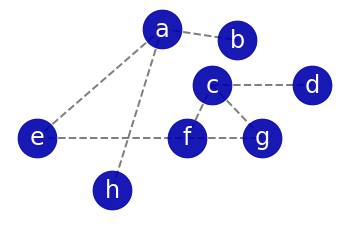

In [21]:
# pos = nx.spring_layout(G) # for a random layout
pos= {'a': [-.2, .7], 'b': [.1,  .4], 'c': [0,-.8], 'd': [0.4, -0.8], 'e': [-.7, -2.2], 'f': [-.1, -2.2], 'g': [.2,-2.2], 'h': [ -.4, -3.6], 'i': [ .7, -2.4], 'j': [.8, .7]}
nx.draw_networkx_nodes(G_shortest_path, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(G_shortest_path, pos,
                           width=2, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(G_shortest_path, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-4.5,1.3])
limits=plt.axis('off') # turn of axis

### Q3 a. Minimum spanning trees

As described at https://www.hackerearth.com/practice/algorithms/graphs/minimum-spanning-tree/tutorial/, a minimum spanning tree (MST) is a subset of edges of a connected, weighted, undirected graph that connects all the vertices together, without any cycles and with the minimum possible total edge weight. Examples of real-world applications for MSTs are cluster analysis and image segmentation.

It is important to distinguish between Dijkstra's shortest path tree and a MST. Dijkstra's algorithm constructs a shortest path tree from a specified source node. This tree has the property that the length of any path from the source node to another node in the graph is minimised. However, the sum of the costs of the edges in the shortest path tree might be greater than the MST. This is because an MST is a tree which connects all nodes in the graph and has the least total cost among all trees that connect all nodes. However, in contrast to Dijkstra's shortest path tree, each individual path from source to node might not be the shortest. 

There are two algorithms used to create MSTs - Kruskals and Prims. We will focus on Prims for this assignment. In the images below, we will step through Prims algorithm and create a MST from a weighted, undirected graph. The steps are as follows: 
- Pick a random vertex from the graph as the root tree node. (We will start a node 1 as per the assignment specifications). We will begin with all nodes coloured white. 
- From the edge connecting to neighbours of the node (excluding nodes already in the tree), find the minimum-weighted edge and add it to the tree. It is understood that this problem would begin with all nodes connected to all other nodes. In other words, in the graph at the beginning there would be 7 edges connected to every node. However, for ease of visualisation and explanation, we are beginning the graph with no edges connecting nodes. For this example, let us assume that this means the same as all nodes being connected. We will then add the minimum weighted edge coloured blue to connect each node. 
- We then the vertex connected by that edge as visited. We will change a node to orange when it is visited. 
- Repeat until all vertices are in the minimum spanning tree. 

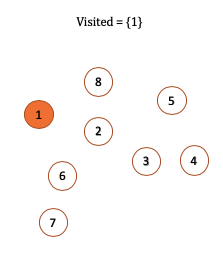

In the image above, we begin at vertex 1. We imagine that all vertices are connected to all others. 

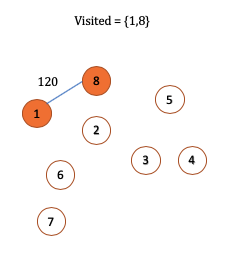

The minimum weighted edge from 1 is to 8, with a weight of 120. We mark 8 as visited. 

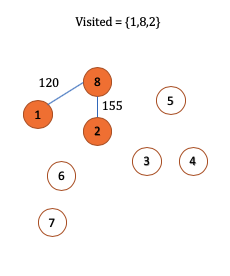

Above, we move to vertex 2 and mark it as visited as the minimum weighted node from 1 and 8 is 155 to vertex 2. 

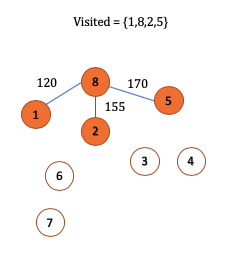

In the image above we move to vertex 5 as this is the minimum weighted edge from the visited vertices. 

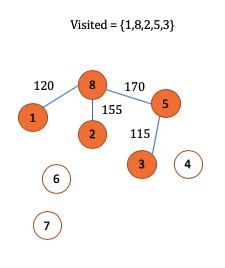

Above, we see that the minimum weighted edge from the visited vertices is from 5 to 3 with a weight of 115.

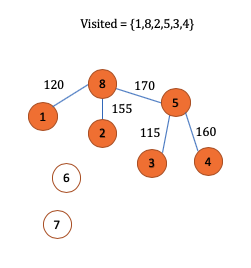

Above we move to vertex 4 as the edge from 5 to 4 is the minimum of all edges from the visited vertices. 

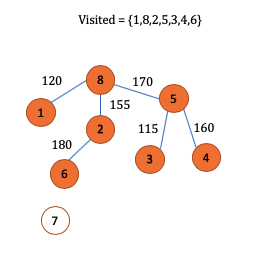

In the image above, we move to vertex 6 as 180 is the minimum weighted edge.

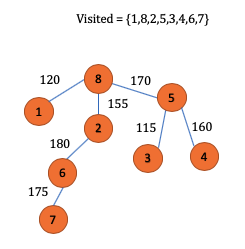

Finally, we move to that last vertex 7.

### b. Verify your answer in part a using networkz Python package

#### i. Create an empty weighted graph.

In the cell below we create an empty weighted graph. 

In [22]:
G = nx.Graph()

#### ii. Add vertices (nodes) with their weights given in table 2 to G.

- Next we will iterate through each of the nodes in ```G_mst``` and add each to the graph using the  ```add_node()``` method. 
- The next step is then to add the edges to the graph. To do this we have created a dictionary of nodes. 
- The keys of the dictionary are each of the nodes excluding the last. The value for each key is an array of arrays. Within each nested array is a node and an integer value. The node represents a neighbour of the node which is the key and the integer value denotes the weight of the edge to that neighbouring node. 
- We then iterate through the dictionary and for each node we use the ```add_edge()``` method within the ```networkx``` library. 
- We have printed information regarding the graph below for ease of understanding and to ensure that our nodes and edges were correctly added. 

In [23]:
#add nodes to graph
for node in ['1','2','3','4','5','6','7','8']:
    G.add_node(node)

#dictionary of edges and weights for each node
nodes_dict = {
    '1':[['2',240], ['3',210], ['4',340],['5',280],['6',200],['7',345],['8',120]],
    '2': [['3',265], ['4',175], ['5',215], ['6',180], ['7',185], ['8',155]],
    '3': [['4',260], ['5',115], ['6',350], ['7',435], ['8', 195]],
    '4': [['5',160], ['6',330], ['7',295], ['8',230]],
    '5': [['6',360], ['7',400], ['8',170]],
    '6': [['7',175], ['8',205]], 
    '7': [['8', 305]]
}

#add edges with weights to each node
for node in nodes_dict: 
    for edge in nodes_dict[node]:
        G.add_edge(node, edge[0], weight = edge[1])

#### iii Draw G.

In the cell below we draw G. We have chosen to add co-ordinates rather than creating a random layout. 

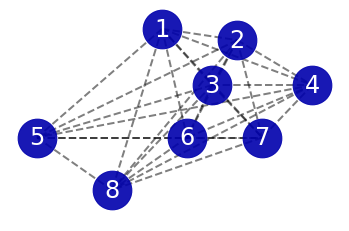

In [24]:
# Draw G with specific co-ordinates. 
pos= {'1': [-.2, .7], '2': [.1,  .4], '3': [0,-.8], '4': [0.4, -0.8], '5': [-.7, -2.2], '6': [-.1, -2.2], '7': [.2,-2.2], '8': [ -.4, -3.6]}
nx.draw_networkx_nodes(G, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(G, pos,
                           width=2, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(G, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-4.5,1.3])
limits=plt.axis('off') # turn of axis

As described above when showing our images, the graph begins with all nodes connected to all other nodes. 

#### iv. Compute the MST using Prim's algorithm. 

In the cell below we compute the minimum spanning tree using networkz. The output will be a list of tuples. Each tuple will be a step in the MST connecting two vertices. 

In [25]:
mst = list(tree.minimum_spanning_edges(G, algorithm='prim', data=False))

In [26]:
#output the results
mst

[('1', '8'),
 ('8', '2'),
 ('8', '5'),
 ('5', '3'),
 ('5', '4'),
 ('2', '6'),
 ('6', '7')]

We can see that the MST is the same as that we obtained in our images above. 

#### v. Draw the MST graph after removing all edges not in the MST

We will now draw the MST graph after removing all edges not in the MST. We will include only the nodes and distances included in our images and in the output from ```minimum_spanning_edges()``` above. To do this we will again iterate through the nodes and add all to G_mst using the  ```add_node()``` method. We will then add the edges and weights which are part of the shortest path tree using ```add_edge()```.

In [27]:
G_mst = nx.Graph()

for node in ['1','2','3','4','5','6','7','8']:
    G_mst.add_node(node)


nodes_dict = {
    '1':[['8',120]],
    '2': [['6',180],['8',155]],
    '3': [['5',115]],
    '4': [['5',160]],
    '5': [['8',170]],
    '6': [['7',175]], 
}

for node in nodes_dict: 
    for edge in nodes_dict[node]:
        G_mst.add_edge(node, edge[0], weight = edge[1])

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 28
Average degree:   7.0000


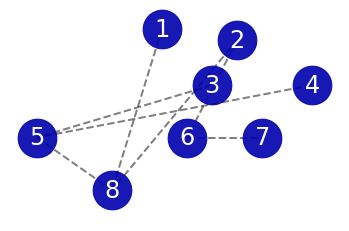

In [28]:
# Draw G with specific co-ordinates. 
pos= {'1': [-.2, .7], '2': [.1,  .4], '3': [0,-.8], '4': [0.4, -0.8], '5': [-.7, -2.2], '6': [-.1, -2.2], '7': [.2,-2.2], '8': [ -.4, -3.6]}
nx.draw_networkx_nodes(G_mst, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(G_mst, pos,
                           width=2, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(G_mst, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-4.5,1.3])
limits=plt.axis('off') # turn of axis

We can see that this graph contains the same edges connecting vertices as our final graph shown in part a above. 

# Conclusion

This has been a very diverse and interesting assignment. I have explored and learned more about hash tables, searching algorithms, sorting algorithms, graphs and trees. We have seen the similarities and differences between many of these data structures and have learned how to implement them. Overall, this has been a very enjoyable and rewarding assignment.